In [ ]:
##Feature selection-Information gain - mutual information in classification problem statements
#mutual information

In [7]:
import pandas as pd
df=pd.read_csv('train.csv')
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [8]:
df['var3'].unique()

array([      2,     229,     178,       0,       8,       3,       4,
            10,     110,       7,     177,       1,       6,     137,
            17, -999999,      13,      14,     148,       5,      11,
            15,     122,      22,       9,      58,     121,      12,
           127,      33,     125,     209,      72,      31,      51,
            16,     107,     174,     141,     191,     104,     129,
            18,      49,      73,      94,     131,     219,     187,
           114,      28,      89,     115,      53,     126,      47,
            84,     235,     161,     197,      23,      30,     146,
           158,     138,      26,     120,      66,     216,     215,
            90,      20,      21,     103,     192,     142,      29,
           163,     223,      95,      98,      38,     156,      97,
           105,     150,     183,     184,      52,      54,     220,
            25,     225,      86,     124,      27,     162,      19,
           195,     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
#train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
     df.drop(labels=['var3'],axis=1),
     df['var3'],
     test_size=0.3,
     random_state=0)

In [11]:
X_train.head()

,ID,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
7526,15083,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
51929,103706,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451931.220000,0
46677,93351,40,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41225.670000,0
46194,92424,83,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
20190,40437,79,0.0,535.41,535.41,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153477.690000,0


In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([1.89935181e-04, 1.43715335e-02, 2.62738485e-03, 1.00744772e-02,
       1.15504248e-02, 7.19564875e-04, 1.38522884e-03, 7.03850668e-04,
       0.00000000e+00, 1.41173380e-03, 8.11234061e-03, 9.72093611e-03,
       1.23504461e-03, 2.10484483e-03, 8.19456467e-03, 3.11150639e-04,
       1.93600252e-03, 9.11050931e-03, 0.00000000e+00, 3.86672316e-03,
       1.62178837e-03, 3.41958020e-04, 0.00000000e+00, 2.37568419e-02,
       9.53534895e-03, 9.82767837e-04, 2.75418712e-04, 7.68448171e-05,
       1.11753985e-03, 2.87265120e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.10608318e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.20569470e-05, 0.00000000e+00,
       3.07680736e-05, 1.94388197e-04, 1.51811969e-03, 0.00000000e+00,
       6.21639368e-04, 0.00000000e+00, 2.14499766e-03, 2.12260592e-03,
       1.16030264e-03, 5.64839904e-04, 8.90229649e-04, 1.85219090e-03,
       3.96761565e-04, 1.45450048e-03, 4.73025463e-04, 2.68036472e-04,
      

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

num_var41_0                 0.055836
num_var39_0                 0.049626
num_meses_var39_vig_ult3    0.040664
ind_var30_0                 0.031289
ind_var39_0                 0.027179
                              ...   
num_aport_var17_ult1        0.000000
saldo_var29                 0.000000
saldo_var31                 0.000000
num_var2_ult1               0.000000
saldo_var33                 0.000000
Length: 370, dtype: float64

<AxesSubplot:>

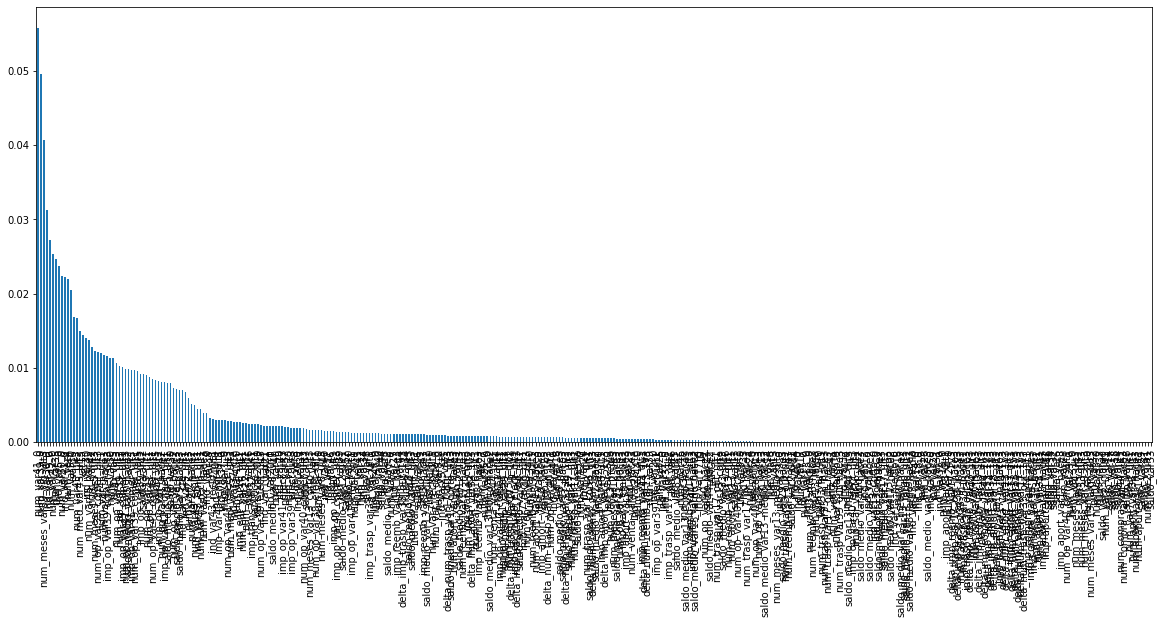

In [14]:
#lets plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
#No we will select the top 5 important features
sel_five_cols= SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ind_var30_0', 'ind_var39_0', 'num_var39_0', 'num_var41_0',
       'num_meses_var39_vig_ult3'],
      dtype='object')

In [18]:
sel_five_cols.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
X_train.columns[sel_five_cols.get_support()]

Index(['ind_var30_0', 'ind_var39_0', 'num_var39_0', 'num_var41_0',
       'num_meses_var39_vig_ult3'],
      dtype='object')